In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from visual_behavior import database as db
import visual_behavior.utilities as vbu
import visual_behavior.plotting as vbp
import sys

from scipy import signal

from dro.modules import eye_tracking as et

from multiprocessing import Pool

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'utilities'

In [ ]:
%matplotlib notebook

In [ ]:
def get_eyetracking_timestamps(experiment_id):
    folder = get_experiment_folder(experiment_id)
    df = pd.read_hdf(os.path.join(folder,'timestamps.h5'))
    return df['behavior_monitoring'].iloc[0] #note: the 'eye_tracking' and 'behavior_monitoring' labels are swapped in this dataset

def get_experiment_folder(experiment_id):
    folder = fix_path(r"\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\visual_behavior_pilot_analysis\visual_behavior_pilot_manuscript_resubmission")
    for fn in os.listdir(folder):
        if isint(fn[:9]) and int(fn[:9]) == int(experiment_id):
            break
        fn = None
    if fn is not None:
        return os.path.join(folder,fn)
    
def fix_path(path):
    if sys.platform == 'linux':
        return path.replace('\\','/')
    else:
        return path
    
def isint(string):
    try:
        int(string)
        return True
    except ValueError:
        return False

In [ ]:
oeid = 645086795
osid = 645055845

In [78]:
ed = vbu.EyeTrackingData(int(osid))
sync_timestamps = get_eyetracking_timestamps(ed.ophys_experiment_id)
filename_timestamps = vbu.Movie(ed.filepaths['eye_movie']).timestamps_from_file

<IPython.core.display.Javascript object>


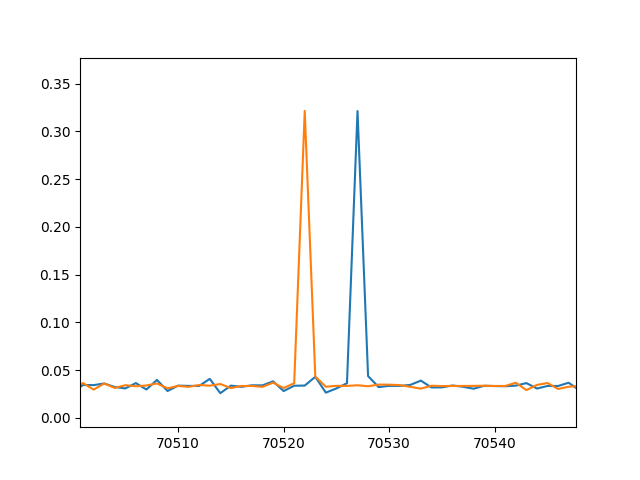

In [79]:
fig,ax=plt.subplots()
ax.plot(np.diff(sync_timestamps))
ax.plot(np.diff(filename_timestamps))

<IPython.core.display.Javascript object>


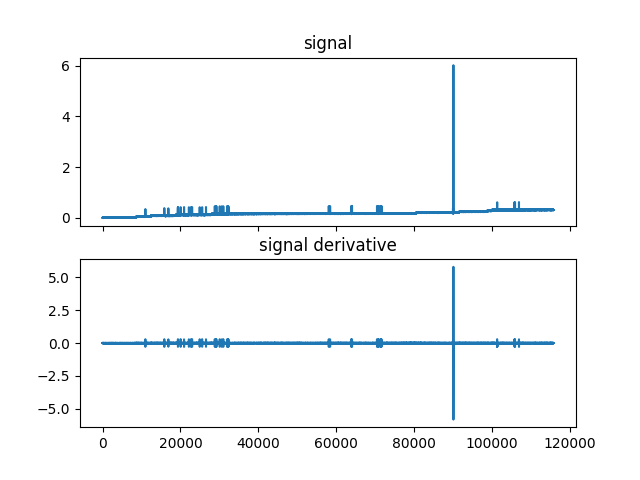

Text(0.5, 1.0, 'signal derivative')

In [80]:
x = sync_timestamps[:len(filename_timestamps)]-sync_timestamps[0]
y = filename_timestamps[:len(filename_timestamps)]
fig,ax=plt.subplots(2,1,sharex=True)
v = y-x
ax[0].plot(v)

dv = np.diff(v)
ax[1].plot(dv)

ax[0].set_title('signal')
ax[1].set_title('signal derivative')

In [81]:
def kernel(vector,i,n=500):
    return 1/n*np.sum(vector[i:i+n]) - 1/n*np.sum(vector[i-n-1:i-1])

change_point_detection = np.zeros_like(v)
n = 100
for i in range(n+1,len(v)-n):
    change_point_detection[i] = kernel(v,i,n)

In [84]:
expected_number_of_peaks = len(sync_timestamps) - len(filename_timestamps)
expected_number_of_peaks

8

In [83]:
from scipy.signal import find_peaks
number_of_peaks = np.inf
height = 0.00001
expected_number_of_peaks = len(sync_timestamps) - len(filename_timestamps)

while number_of_peaks > expected_number_of_peaks:
    
    peaks, _ = find_peaks(change_point_detection, height=height)
    number_of_peaks = len(peaks)
    print(number_of_peaks,height)
    height *= 10

16936 1e-05
12398 0.0001
667 0.001
576 0.01
19 0.1
0 1.0


In [85]:
peaks, _ = find_peaks(change_point_detection, height=0.1)

<IPython.core.display.Javascript object>


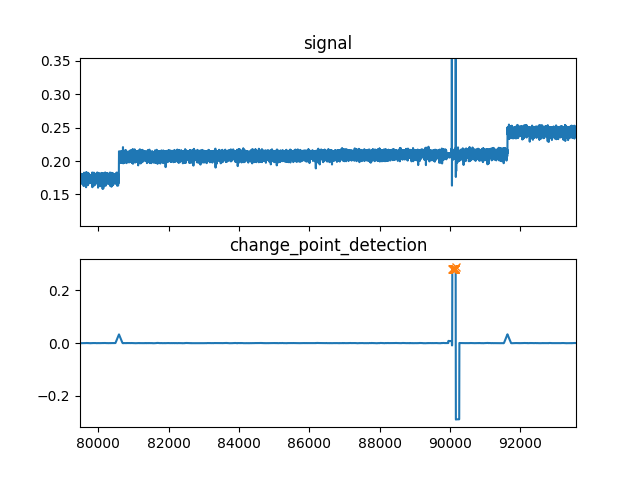

number of peaks = 19


In [86]:
x = sync_timestamps[:len(filename_timestamps)]-sync_timestamps[0]
y = filename_timestamps[:len(filename_timestamps)]
fig,ax=plt.subplots(2,1,sharex=True)
v = y-x
ax[0].plot(v)

dv = np.diff(v)
ax[1].plot(change_point_detection)
ax[1].plot(peaks, change_point_detection[peaks], "x")

ax[0].set_title('signal')
ax[1].set_title('change_point_detection')

print('number of peaks = {}'.format(len(peaks)))

In [63]:
peaks

array([  4388,   8008,   8731,  10082,  10895,  17088,  20379,  22271,
        25198,  25466,  28937,  30201,  30558,  35313,  37995,  40585,
        42708,  48765,  49594,  50344,  52074,  52639,  58747,  62734,
        63857,  64311,  75572,  80369,  84356,  98823,  99230, 105356])

<IPython.core.display.Javascript object>


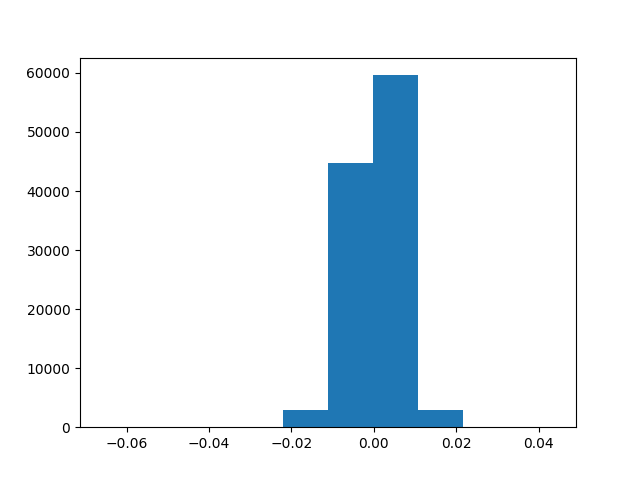

(array([1.0000e+00, 0.0000e+00, 2.0000e+00, 3.9000e+01, 2.9340e+03,
        4.4805e+04, 5.9620e+04, 2.8960e+03, 5.9000e+01, 5.0000e+00]),
 array([-0.06587776, -0.05492797, -0.04397817, -0.03302838, -0.02207859,
        -0.01112879, -0.000179  ,  0.0107708 ,  0.02172059,  0.03267039,
         0.04362018]),
 <a list of 10 Patch objects>)

In [19]:
fig,ax=plt.subplots()
dv = np.diff(v)
ax.hist(dv)

In [21]:
dv.max()

0.04362017916128025

In [22]:
dv.min()

-0.06587776118794864